In [1]:
# dependencies
import pandas as pd
import numpy as np

In [2]:
# read in CSV
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# add vintage year based on year in title
all_wines['vintage'] = all_wines['title'].str.extract('(\d\d\d\d)', expand=True)

# filling in known variety for nulls
all_wines.iloc[86909, 7] = 'Syrah-Petite Sirah'

# drop unneeded columns
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'title', \
                                      'taster_name', 'taster_twitter_handle'])

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
89129,Italy,88,21.0,Piedmont,Dolcetto,Pio Cesare,2008
118868,France,90,45.0,Champagne,Champagne Blend,Taittinger,NaN
78178,Greece,90,23.0,Pangeon,White Blend,Estate Biblia Chora,2014
23861,US,90,36.0,Oregon,Pinot Noir,Sineann,2007
33699,US,91,36.0,California,Nero d'Avola,Chiarito,2007
57243,US,90,18.0,New York,Rosé,Damiani,2015
57019,Italy,90,58.0,Northeastern Italy,Verduzzo Friulano,La Roncaia,2008
27539,Spain,88,22.0,Spain Other,Moscatel,Asensio,2006
22752,New Zealand,84,15.0,Marlborough,Sauvignon Blanc,Lake Chalice,2001
35852,France,92,NaN,Bordeaux,Bordeaux-style Red Blend,Château Tronquoy-Lalande,2010


In [4]:
# filling in known country for nulls
has_country = clean_wines[pd.notnull(clean_wines['country'])]
has_country_series = pd.Series(data=has_country['country'].values, index=has_country['winery'])
has_country_dict = has_country_series.to_dict()
clean_wines.loc[clean_wines['country'].isnull(), 'country'] \
    = clean_wines['country'].fillna(clean_wines['winery'].map(has_country_dict))

# drop the remaining nulls
clean_wines = clean_wines.dropna()

# replace variety names with common wine names
clean_wines['variety'] = clean_wines['variety'].replace(['Weissburgunder'], 'Chardonnay')
clean_wines['variety'] = clean_wines['variety'].replace(['Spatburgunder'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Grauburgunder'], 'Pinot Gris')
clean_wines['variety'] = clean_wines['variety'].replace(['Garnacha'], 'Grenache')
clean_wines['variety'] = clean_wines['variety'].replace(['Pinot Nero'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Alvarinho'], 'Albarino')

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
57299,Italy,91,59.0,Piedmont,Nebbiolo,Cascina Cucco,2011
116720,US,89,22.0,California,Bordeaux-style Red Blend,Buttonwood,2013
83844,US,81,10.0,California,Petite Sirah,Discoveries,2009
32528,US,84,30.0,California,Zinfandel,Wine Guerrilla,2008
121551,France,90,25.0,Bordeaux,Merlot,Château Lamothe-Vincent,2010
46308,Greece,89,50.0,Crete,Red Blend,Lyrarakis,2008
70548,France,91,50.0,Rhône Valley,Syrah,Cave de Tain,2009
40510,US,88,13.0,California,Zinfandel,Sobon Estate,2011
96974,France,87,20.0,Burgundy,Chardonnay,Domaine de l'Echelette,2016
36036,Spain,86,13.0,Northern Spain,Tempranillo,Bodegas Breton,2008


count    116778.000000
mean         88.457406
std           3.045578
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

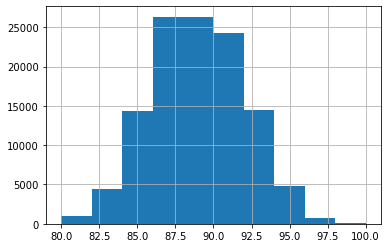

In [5]:
# plot histogram
clean_wines['points'].hist()

# decribe dataframe
clean_wines['points'].describe()

In [6]:
# add rating
clean_wines['quality'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 89 else 'Poor')
# Adding letter grade
clean_wines['grade'] = clean_wines['points'].apply(lambda x: 'A' if x >= 92 else
                                                             'B' if x >= 89 else
                                                             'C' if x >= 86 else
                                                             'F')
# drop points...
clean_wines = clean_wines.drop(columns = ['points'])
# .. and then create export of final dataframe 
clean_wines.to_csv('Data/recommend_neural_model_df.csv')


# sample
clean_wines.sample(10)

,country,price,province,variety,winery,vintage,quality,grade
111882,Italy,30.0,Sicily & Sardinia,Syrah,Tasca d'Almerita,2009,Good,B
26342,US,22.0,California,Sauvignon Blanc,Bernardus,2014,Poor,C
93955,US,8.0,California,Cabernet Sauvignon,Woodbridge by Robert Mondavi,2011,Poor,C
16360,South Africa,35.0,Coastal Region,Syrah,The Foundry,2004,Poor,C
79306,US,25.0,California,Red Blend,Lake and Vine Cellars,2013,Poor,C
25791,Italy,16.0,Tuscany,Red Blend,Aia Vecchia,2011,Poor,C
116434,US,22.0,California,Roussanne,Wellington,2010,Poor,C
105478,US,16.0,California,Chenin Blanc-Viognier,Terra d'Oro,2014,Good,B
25221,Italy,140.0,Tuscany,Sangiovese Grosso,Tenuta di Sesta,2006,Good,A
22149,US,68.0,Washington,Syrah,Doyenne,2013,Good,B


In [7]:
# LabelEncoder dependency
from sklearn.preprocessing import LabelEncoder

# create features
number = LabelEncoder()
features = clean_wines[['country','price','province','variety','winery','vintage']]
features['country'] = number.fit_transform(features['country'].astype('str'))
features['province'] = number.fit_transform(features['province'].astype('str'))
features['variety'] = number.fit_transform(features['variety'].astype('str'))
features['winery'] = number.fit_transform(features['winery'].astype('str'))

# features 
features.sample(10)

C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\audri\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,country,price,province,variety,winery,vintage
79839,0,11.0,210,76,12609,2012
54442,36,21.0,255,312,2172,2008
33587,20,24.0,131,202,2111,2006
28391,21,20.0,253,253,14856,2012
106184,14,20.0,29,188,7677,2015
22536,21,17.0,67,257,10988,2013
104710,39,50.0,51,76,8573,2008
4842,39,15.0,51,423,12154,2014
73684,2,30.0,331,462,7426,2002
95957,3,40.0,46,52,15259,2011


In [8]:
X = features
y = clean_wines['quality'].astype('category')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.head()

,country,price,province,variety,winery,vintage
100326,39,30.0,51,8,1610,2016
17304,8,20.0,61,495,9900,2013
45169,2,13.0,406,516,15303,2007
61058,3,29.0,378,462,7517,2014
31290,0,35.0,210,271,386,2013


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 42,002
Trainable params: 42,002
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 87583 samples
Epoch 1/100
87583/87583 - 6s - loss: 0.5435 - accuracy: 0.7280
Epoch 2/100
87583/87583 - 5s - loss: 0.5307 - accuracy: 0.7337
Epoch 3/100
87583/87583 - 5s - loss: 0.5247 - accuracy: 0.7377
Epoch 4/100
87583/87583 - 6s - loss: 0.5208 - accuracy: 0.7397
Epoch 5/100
87583/87583 - 7s - loss: 0.5194 - accuracy: 0.7406
Epoch 6/100
87583/87583 - 7s - loss: 0.5172 - accuracy: 0.7414
Epoch 7/100
87583/87583 - 6s - loss: 0.5162 - accuracy: 0.7425
Epoch 8/100
87583/87583 - 5s - loss: 0.5140 - accuracy: 0.7430
Epoch 9/100
87583/87583 - 6s - loss: 0.5137 - accuracy: 0.7438
Epoch 10/100
87583/87583 - 7s - loss: 0.5129 - accuracy: 0.7439
Epoch 11/100
87583/87583 - 6s - loss: 0.5110 - accuracy: 0.7454
Epoch 12/100
87583/87583 - 6s - loss: 0.5106 - accuracy: 0.7451
Epoch 13/100
87583/87583 - 6s - loss: 0.5102 - accuracy: 0.7447
Epoch 14/100
87583/87583 - 6s - loss: 0.5087 - accuracy: 0.7461
Epoch 15/100
87583/87583 - 6s - loss: 0.5085 - accuracy: 0.7459
Epoch 16/100
87583/87583 -

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

29195/29195 - 2s - loss: 0.5047 - accuracy: 0.7487
Normal Neural Network - Loss: 0.5047189325681184, Accuracy: 0.7486556172370911


In [15]:
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [16]:
d = {'prediction' : prediction_labels, 
     'actual' : y_test}

In [17]:
predictions_df = pd.DataFrame(data=d)
predictions_df

,prediction,actual
114575,Good,Good
126892,Poor,Poor
110324,Good,Good
49025,Poor,Poor
93635,Poor,Good
...,...,...
34317,Poor,Poor
53872,Good,Good
120987,Poor,Poor
114969,Poor,Poor


In [18]:
predictions_df.to_csv('Data/recommend_neural_model_predictions_df.csv')